In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing libraries

df=pd.read_csv('car data.csv')
df

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

# Domain Analysis

We are predicting the selling price of different cars based on several factors:

Features:

-Purchased Year

-Present Price (Crucial feature)

-Driven Kilometers

-Fuel Type

-Selling Type

-Transmission

-Owner

Total Features: 9 (including categorical and numerical features).

-Output Feature: Selling Price

Key Insight: Present Price plays a significant role in price prediction.

Time-Based Feature: The dataset includes Year, which can be used to derive car age (Current Year - Purchased Year).

The Task which is we gonna do is regression task

# Basic Check

all the values with in the dataset are non-null

encoding task- Car_Name , Fuel_Type	,Selling_type,  Transmission

scaling task-Selling_Price,	Present_Price,Driven_kms

outliers handling - selling_price , present_price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

In [5]:
df.describe(include='O')

Car_Name Fuel_Type Selling_type Transmission
count       301       301          301          301
unique       98         3            2            2
top        city    Petrol       Dealer       Manual
freq         26       239          195          261

# EDA - Exploratory Data Analysis

Insights from Histogram:

1]Year of Vehicles:

Most vehicles were manufactured between 2010 and 2018.

2]Ownership:

More than 90% of vehicles had 0 previous owners (i.e., they were never resold).

3]Fuel Type Distribution:

Petrol vehicles dominate the dataset.

4]Diesel & CNG are fewer, with only 2 CNG vehicles recorded.

5]Seller Type Distribution:

Dealers hold 196 vehicles, while individuals hold 106.

6]Transmission Type:

More than 70% of vehicles have manual transmission

7]no corrupted values(like 0) in selling and present price.

In [6]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

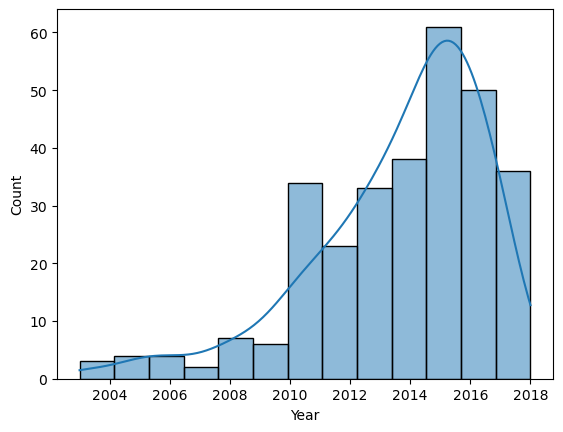

In [7]:
sns.histplot(x=df['Year'] , kde=True)
plt.show()

<Axes: xlabel='Owner', ylabel='Count'>

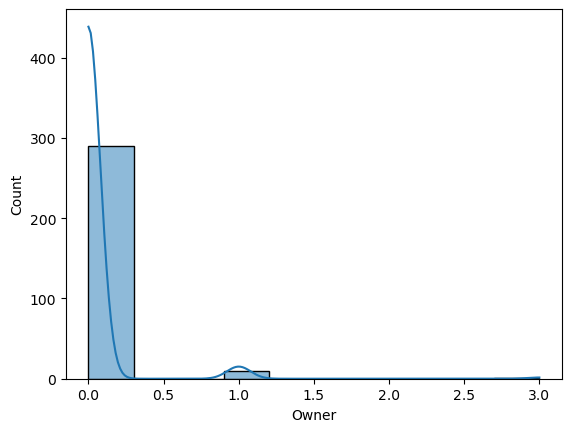

In [8]:
sns.histplot(x=df['Owner'] , kde=True)

<Axes: xlabel='Fuel_Type', ylabel='Count'>

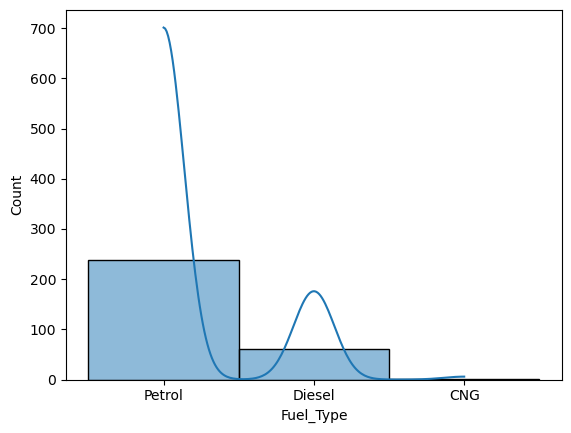

In [9]:
sns.histplot(x=df['Fuel_Type'] , kde=True)

<Axes: xlabel='Selling_type', ylabel='Count'>

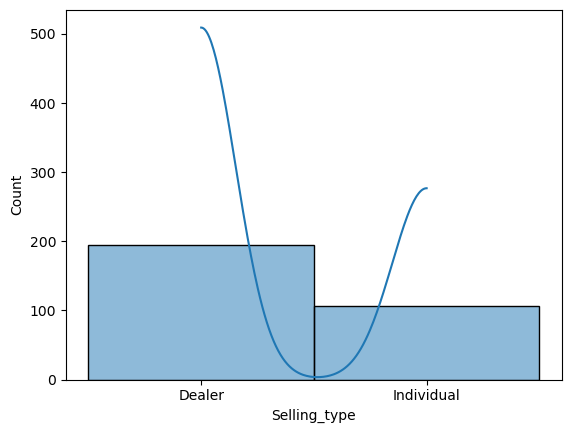

In [10]:
sns.histplot(x=df['Selling_type'] , kde=True)

<Axes: xlabel='Transmission', ylabel='Count'>

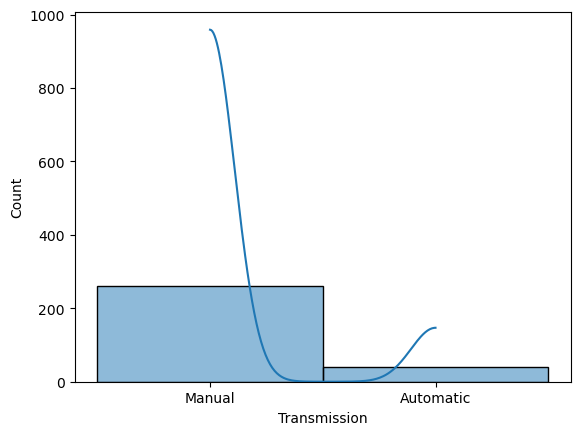

In [11]:
sns.histplot(x=df['Transmission'] , kde=True)

<Axes: xlabel='Present_Price', ylabel='Count'>

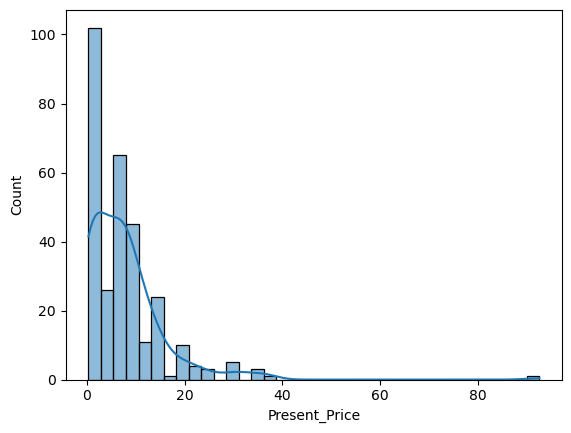

In [12]:
sns.histplot(x=df['Present_Price'] , kde=True)

<Axes: xlabel='Selling_Price', ylabel='Count'>

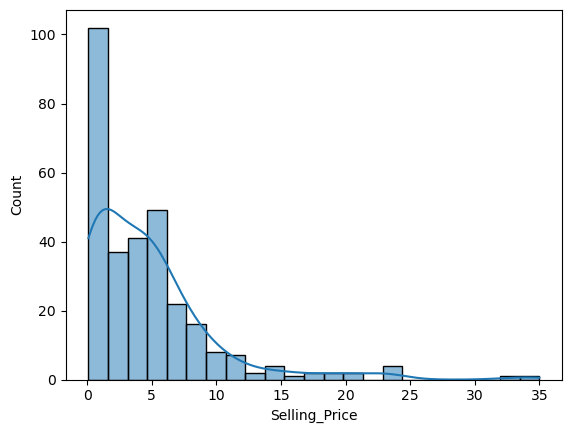

In [13]:
sns.histplot(x=df['Selling_Price'] , kde=True)

# Bi-Variate

Bi-Variate Analysis

1]Year vs. Selling Price
`
Most vehicles were manufactured between 2010-2018,  accrording to data still they are highely driven so.

There is weak connection and correlation between Year and Selling_Price.(0.23) 

2]Driven_kms vs. Selling Price

Despite good variance in Driven_kms, its correlation with Selling_Price is very weak (0.029).

Most cars have been driven between 0 to 100,000 km, meaning mileage alone does not strongly impact price.

3]Present Price vs. Selling Price

Strong positive correlation (0.87), indicating that higher new car prices generally lead to higher resale value.

4]Owners vs. Selling Price

Weak correlation (-0.088), meaning the number of previous owners does not significantly impact the selling price.

5]Transmission and Fuel_type vs Selling Price

Selling Price is not differeing because of this columns still gonna keep it since they are categorical columns.

so , hence we can exclude two features (driven_kms , owner )while training .

we will include year feature because we have various models so we cant decide vehicles price by purchased year.

<Axes: xlabel='Selling_Price', ylabel='Year'>

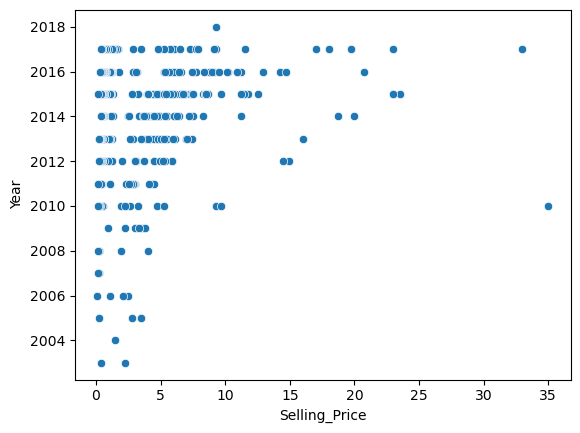

In [14]:
# there is no relation b/w purchased year and selling_price

sns.scatterplot(y=df['Year'] , x=df['Selling_Price'])

<Axes: xlabel='Driven_kms', ylabel='Selling_Price'>

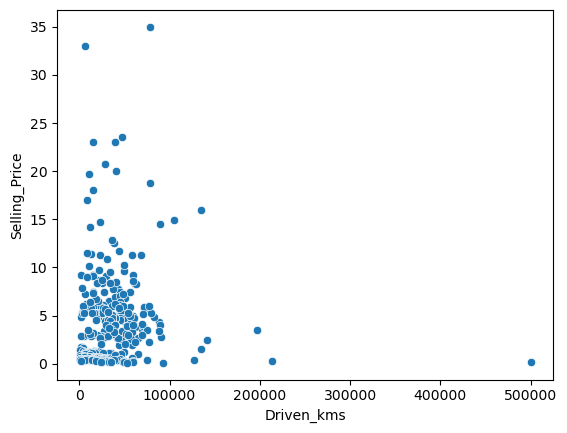

In [15]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

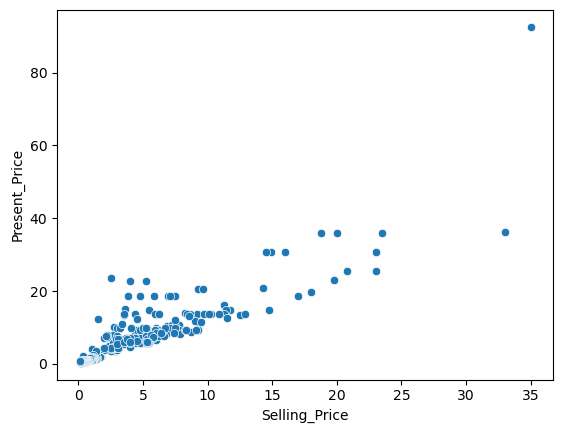

In [16]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Present_Price'])

<Axes: xlabel='Selling_Price', ylabel='Owner'>

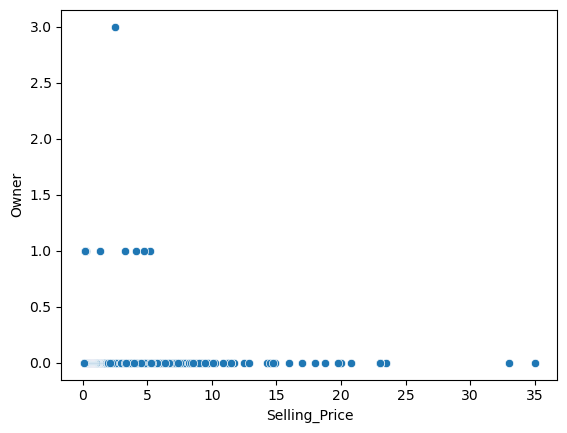

In [17]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Owner'])

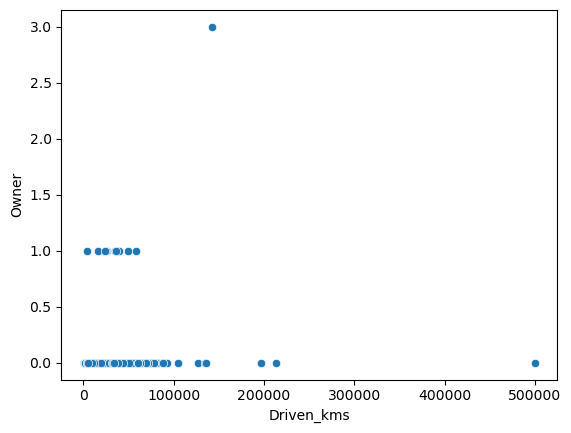

In [18]:
sns.scatterplot(x=df['Driven_kms'] , y=df['Owner'])
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Transmission'>

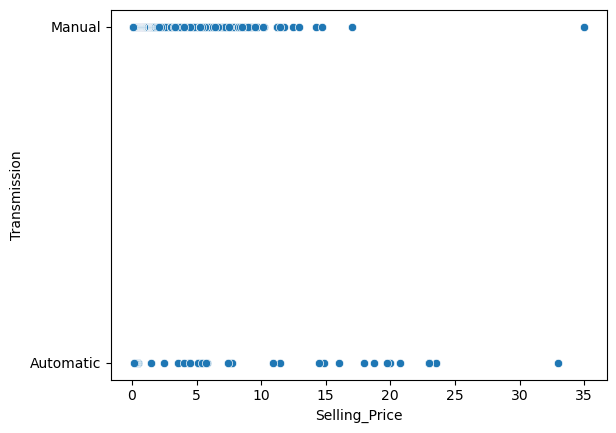

In [19]:
sns.scatterplot(y=df['Transmission'] , x=df['Selling_Price'])

<Axes: xlabel='Selling_Price', ylabel='Fuel_Type'>

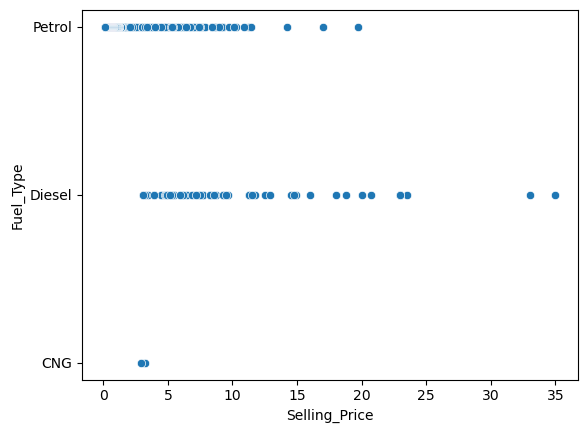

In [20]:
sns.scatterplot(x=df['Selling_Price'] , y=df['Fuel_Type'])

<Axes: xlabel='Selling_Price', ylabel='Selling_type'>

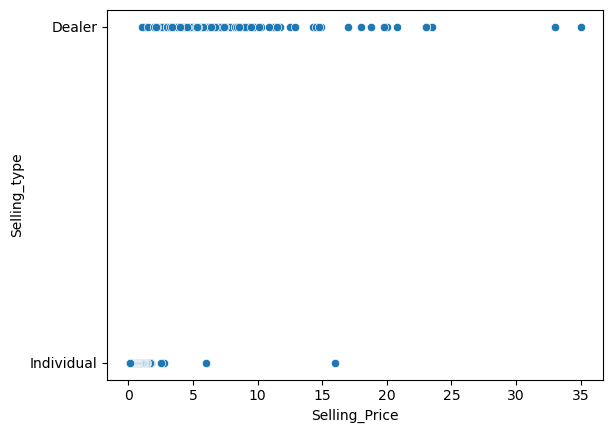

In [21]:
sns.scatterplot(x=df['Selling_Price'],y=df['Selling_type'])

In [22]:
df.corr(numeric_only=True) 

Year  Selling_Price  Present_Price  Driven_kms     Owner
Year           1.000000       0.236141      -0.047192   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878914    0.029187 -0.088344
Present_Price -0.047192       0.878914       1.000000    0.203618  0.008058
Driven_kms    -0.524342       0.029187       0.203618    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008058    0.089216  1.000000

# Feature Enginering

## Data Preprocessing 

1]no null or missing and corrupted values

2]about features:

categorical or discrete:

car_name - label encoder
fuel_type - one hot encoder
transmission - label encoder
selling_type - label encoder

continuos features:

selling price and present price - no corrupted datapoints , outliers are present and then scale it with standard scaler

Car_Age vs. Selling_Price → -0.236 (negative correlation).
Year vs. Selling_Price → 0.236 (positive correlation).

Since both give the same magnitude of correlation but opposite signs, you can use either one. However, Car_Age might be more intuitive for models to understand (newer cars have lower age, older cars have higher age).

In [23]:
#no-null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [24]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Outliers Handling

<Axes: xlabel='Selling_Price'>

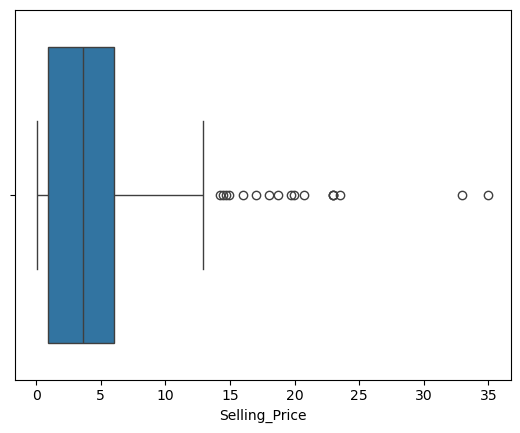

In [25]:
# median=3.6

sns.boxplot(x=df['Selling_Price'])

In [26]:
df['Selling_Price'].median()

3.6

In [27]:
#Selling_price

q1=0.900000
q3=6.000000

iqr=q3-q1

l=q1-iqr*1.5
u=q3+iqr*1.5

print(l , u)

-6.749999999999999 13.649999999999999


In [28]:
#handled all the outliers

df.loc[df['Selling_Price'] >  13.649999999999999  , 'Selling_Price'] = 3.6

<Axes: xlabel='Present_Price'>

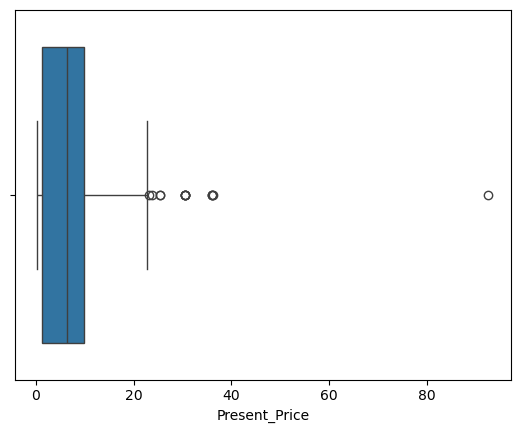

In [29]:
#median= = 6.4

sns.boxplot(x=df['Present_Price'])

In [30]:
df['Present_Price'].median()

6.4

In [31]:
#Present Price 

q1=1.200000
q3=9.900000

iqr=q3-q1

l=q1-iqr*1.5
u=q3+iqr*1.5

print(l,u,iqr)

-11.850000000000001 22.950000000000003 8.700000000000001


In [32]:
#handled all the outliers

df.loc[df['Present_Price']>22.950000000000003  , 'Present_Price'] = 6.4

# Scaling Continuos feature

In [33]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [34]:
#scaled the values

df[['Present_Price' , 'Selling_Price']] = ss.fit_transform(df[['Present_Price' , 'Selling_Price']])
df

Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014      -0.119939      -0.141857       27000    Petrol   
1        sx4  2013       0.353394       0.639850       43000    Diesel   
2       ciaz  2017       1.198631       0.701199        6900    Petrol   
3    wagon r  2011      -0.288987      -0.426834        5200    Petrol   
4      swift  2014       0.302679       0.111455       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016       1.959345       1.047524       33988    Diesel   
297     brio  2015       0.099822      -0.080508       60000    Petrol   
298     city  2009      -0.119939       0.928784       87934    Petrol   
299     city  2017       2.635535       1.225635        9000    Diesel   
300     brio  2016       0.539346      -0.080508        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual      0  
2         Dealer       Manual      0  
3         Dealer       Manual      0  
4         Dealer       Manual      0  
..           ...          ...    ...  
296       Dealer       Manual      0  
297       Dealer       Manual      0  
298       Dealer       Manual      0  
299       Dealer       Manual      0  
300       Dealer       Manual      0  

[301 rows x 9 columns]

# Encoding

## Label Encoder

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [36]:
# encoded cat's values into binary values

df['Car_Name']     = le.fit_transform(df['Car_Name'])
df['Transmission'] = le.fit_transform(df['Transmission'])

In [37]:
df['Selling_type'] = le.fit_transform(df['Selling_type'])

## One-hot encoder

In [38]:
"""self_employed = pd.get_dummies(df.Self_Employed,dtype=int,prefix="Self_employed") # here we are apply OneHot Encoding on Self_employed features and store in Self_employed variables.
df = pd.concat([self_employed,df],axis=1) # here we are merging our Self_employed dummy column with df. Now we don't need self_employed columns we will drop it later"""

'self_employed = pd.get_dummies(df.Self_Employed,dtype=int,prefix="Self_employed") # here we are apply OneHot Encoding on Self_employed features and store in Self_employed variables.\ndf = pd.concat([self_employed,df],axis=1) # here we are merging our Self_employed dummy column with df. Now we don\'t need self_employed columns we will drop it later'

In [39]:
#creating dummies

dummy_fuel = pd.get_dummies(df['Fuel_Type'] , dtype=int)
dummy_fuel

CNG  Diesel  Petrol
0      0       0       1
1      0       1       0
2      0       0       1
3      0       0       1
4      0       1       0
..   ...     ...     ...
296    0       1       0
297    0       0       1
298    0       0       1
299    0       1       0
300    0       0       1

[301 rows x 3 columns]

In [40]:
# merging dummies into main dataframe

df = pd.concat([df , dummy_fuel] , axis=1)

In [41]:
# dropping out old feature

df.drop('Fuel_Type' , axis=1 , inplace=True)
df

Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Selling_type  \
0          90  2014      -0.119939      -0.141857       27000             0   
1          93  2013       0.353394       0.639850       43000             0   
2          68  2017       1.198631       0.701199        6900             0   
3          96  2011      -0.288987      -0.426834        5200             0   
4          92  2014       0.302679       0.111455       42450             0   
..        ...   ...            ...            ...         ...           ...   
296        69  2016       1.959345       1.047524       33988             0   
297        66  2015       0.099822      -0.080508       60000             0   
298        69  2009      -0.119939       0.928784       87934             0   
299        69  2017       2.635535       1.225635        9000             0   
300        66  2016       0.539346      -0.080508        5464             0   

     Transmission  Owner  CNG  Diesel  Petrol  
0               1      0    0       0       1  
1               1      0    0       1       0  
2               1      0    0       0       1  
3               1      0    0       0       1  
4               1      0    0       1       0  
..            ...    ...  ...     ...     ...  
296             1      0    0       1       0  
297             1      0    0       0       1  
298             1      0    0       0       1  
299             1      0    0       1       0  
300             1      0    0       0       1  

[301 rows x 11 columns]

In [42]:
# converting year values as a age of cars.

def car_age(x):
    return 2025-x

In [43]:
df['Year']=car_age(df['Year'])

In [44]:
#re-named it 

df.rename({'Year' : 'Car_Age'} , axis=1 , inplace=True)
df

Car_Name  Car_Age  Selling_Price  Present_Price  Driven_kms  \
0          90       11      -0.119939      -0.141857       27000   
1          93       12       0.353394       0.639850       43000   
2          68        8       1.198631       0.701199        6900   
3          96       14      -0.288987      -0.426834        5200   
4          92       11       0.302679       0.111455       42450   
..        ...      ...            ...            ...         ...   
296        69        9       1.959345       1.047524       33988   
297        66       10       0.099822      -0.080508       60000   
298        69       16      -0.119939       0.928784       87934   
299        69        8       2.635535       1.225635        9000   
300        66        9       0.539346      -0.080508        5464   

     Selling_type  Transmission  Owner  CNG  Diesel  Petrol  
0               0             1      0    0       0       1  
1               0             1      0    0       1       0  
2               0             1      0    0       0       1  
3               0             1      0    0       0       1  
4               0             1      0    0       1       0  
..            ...           ...    ...  ...     ...     ...  
296             0             1      0    0       1       0  
297             0             1      0    0       0       1  
298             0             1      0    0       0       1  
299             0             1      0    0       1       0  
300             0             1      0    0       0       1  

[301 rows x 11 columns]

# Feature Selection

1]owner & driven_kms- excluded for training then will include if model's performance is not good.

2]
Car_Age vs. Selling_Price → -0.236 (negative correlation).

Year vs. Selling_Price → 0.236 (positive correlation).

Since they contain the same information, keep only one (preferably Car_Age since it's more intuitive for models).

In [45]:
df.columns

Index(['Car_Name', 'Car_Age', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Selling_type', 'Transmission', 'Owner', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [46]:
df.corr(numeric_only=True)

Car_Name   Car_Age  Selling_Price  Present_Price  Driven_kms  \
Car_Name       1.000000 -0.017265       0.614043       0.606517    0.064453   
Car_Age       -0.017265  1.000000      -0.273010       0.047832    0.524342   
Selling_Price  0.614043 -0.273010       1.000000       0.788207   -0.003117   
Present_Price  0.606517  0.047832       0.788207       1.000000    0.170085   
Driven_kms     0.064453  0.524342      -0.003117       0.170085    1.000000   
Selling_type  -0.829718  0.039896      -0.735550      -0.738798   -0.101419   
Transmission  -0.059855 -0.000394      -0.024056      -0.094378   -0.162510   
Owner         -0.081192  0.182104      -0.095131      -0.078706    0.089216   
CNG            0.102280  0.017790      -0.016722       0.001751    0.012223   
Diesel         0.353642 -0.064315       0.412477       0.340211    0.172515   
Petrol        -0.369890  0.059959      -0.404104      -0.336428   -0.172874   

               Selling_type  Transmission     Owner       CNG    Diesel  \
Car_Name          -0.829718     -0.059855 -0.081192  0.102280  0.353642   
Car_Age            0.039896     -0.000394  0.182104  0.017790 -0.064315   
Selling_Price     -0.735550     -0.024056 -0.095131 -0.016722  0.412477   
Present_Price     -0.738798     -0.094378 -0.078706  0.001751  0.340211   
Driven_kms        -0.101419     -0.162510  0.089216  0.012223  0.172515   
Selling_type       1.000000      0.063240  0.124269 -0.060300 -0.350467   
Transmission       0.063240      1.000000 -0.050316  0.032018 -0.098643   
Owner              0.124269     -0.050316  1.000000 -0.014272 -0.053469   
CNG               -0.060300      0.032018 -0.014272  1.000000 -0.040808   
Diesel            -0.350467     -0.098643 -0.053469 -0.040808  1.000000   
Petrol             0.358321      0.091013  0.055687 -0.160577 -0.979648   

                 Petrol  
Car_Name      -0.369890  
Car_Age        0.059959  
Selling_Price -0.404104  
Present_Price -0.336428  
Driven_kms    -0.172874  
Selling_type   0.358321  
Transmission   0.091013  
Owner          0.055687  
CNG           -0.160577  
Diesel        -0.979648  
Petrol         1.000000

<Axes: >

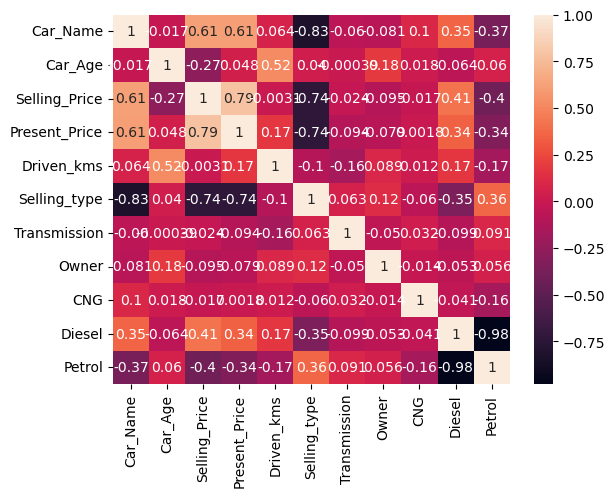

In [47]:
sns.heatmap(df.corr(numeric_only=True) ,annot=True)

# Spliting Train-Test

In [48]:
df.columns

Index(['Car_Name', 'Car_Age', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Selling_type', 'Transmission', 'Owner', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [49]:
# x-input features 
#y-output features

x=df[['Car_Name', 'Car_Age', 'Present_Price', 
       'Selling_type', 'Transmission',  'CNG', 'Diesel', 'Petrol']]
y=df['Selling_Price']

In [50]:
#train-test

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 , random_state=5)

# Importing models

# Tried Tree Based Algo's

In [70]:
# importing and fitting Tree

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt

dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [71]:
pred = dt.predict(x_test)

In [72]:
mean_squared_error(y_test , pred)

0.09234082737895775

In [73]:
root_mean_squared_error(y_test , pred)

0.3038763356679124

In [74]:
r2_score(y_test , pred)

0.894753710979885